In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [2]:
dir_results = 'retrained_models/metrics'
flist       = glob.glob(f'{dir_results}/*.csv')
RESULTS={}
for k, kf in enumerate(flist): # kf = f_csv
    RESULTS[k] = {}
    RESULTS[k]['lot'] = kf.split('_')[-3]
    RESULTS[k]['trial'] =  kf.split('_')[-2] + '-' +  kf.split('_')[-1].split('.')[0]
    RESULTS[k]['fn'] = kf.split('/')[-1]

    # collect csv data
    work = pd.read_csv(kf)
    RESULTS[k]['val_loss'] = work['val_loss'].to_numpy()
    RESULTS[k]['min_val_loss'] = work['val_loss'].min()
    RESULTS[k]['epoch'] = work['epoch']
        

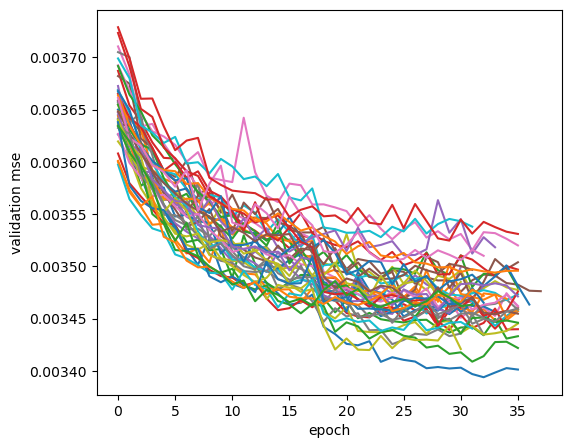

In [3]:
# Showing all top 44 models

fig, ax = plt.subplots()
for k in RESULTS.keys():
    plotdata = RESULTS[k]
    ax.plot(plotdata['val_loss'],label=k)
    
    # dahsed black line:
    # shows "when training was stopped and resumed"
    if False:
        ind_resume = plotdata['epoch'].loc[plotdata['epoch'] ==0 ].index[-1]
        ax.axvline(ind_resume, color='k', ls='--')
    
ax.set_xlabel('epoch')
ax.set_ylabel('validation mse')
fig.set_size_inches(6,5)

/tmp/ipykernel_218546/2607354834.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


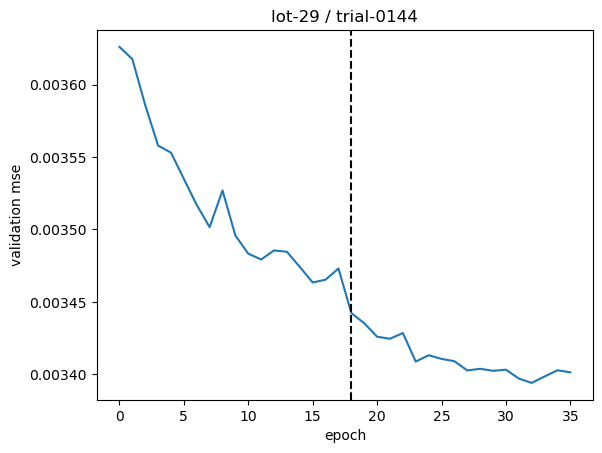

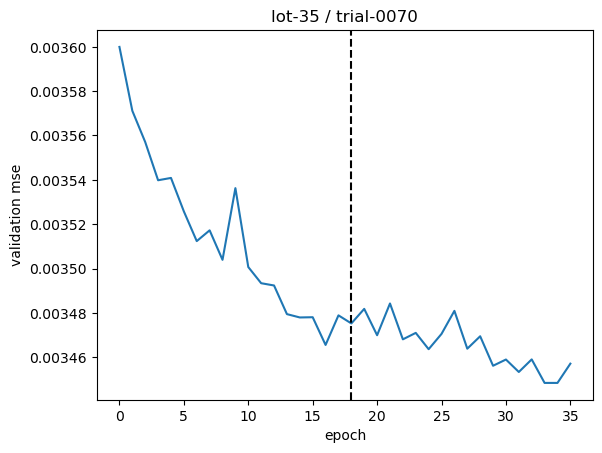

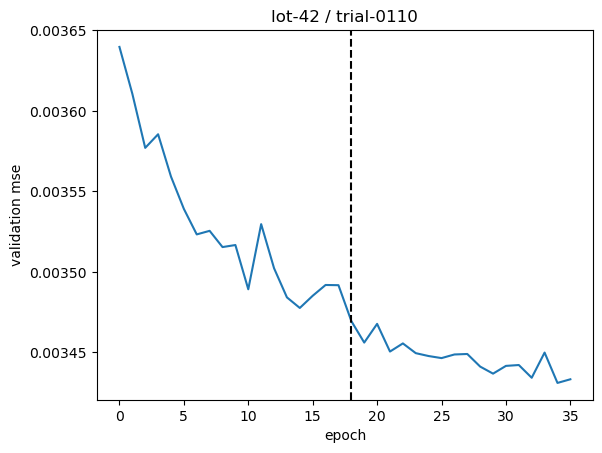

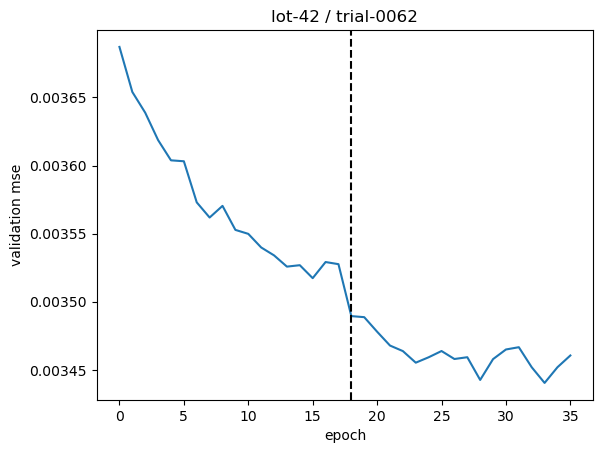

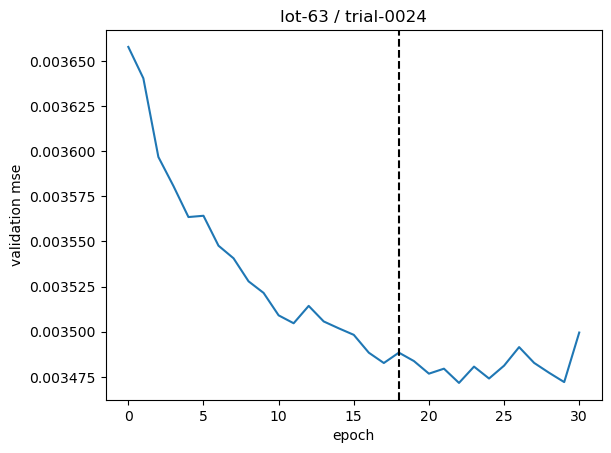

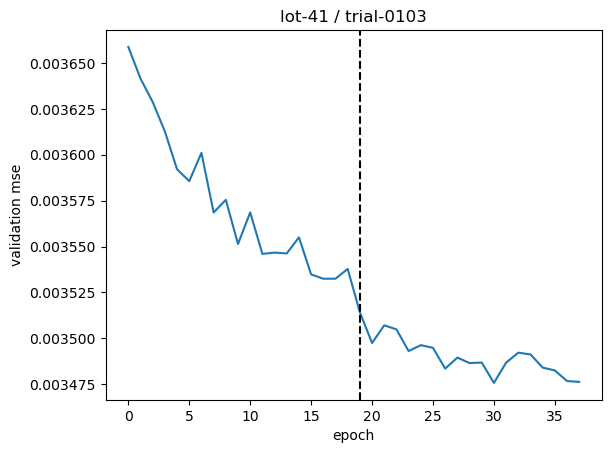

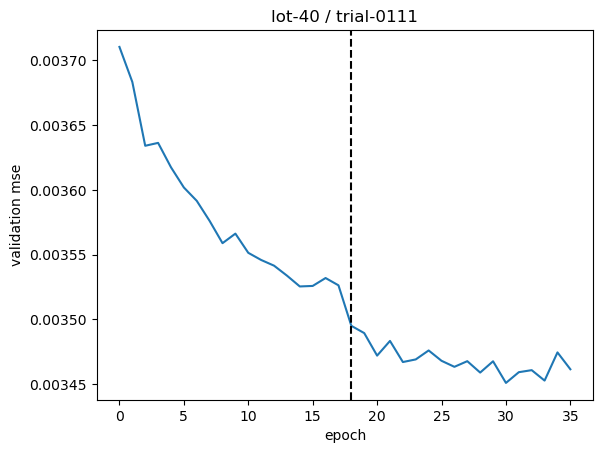

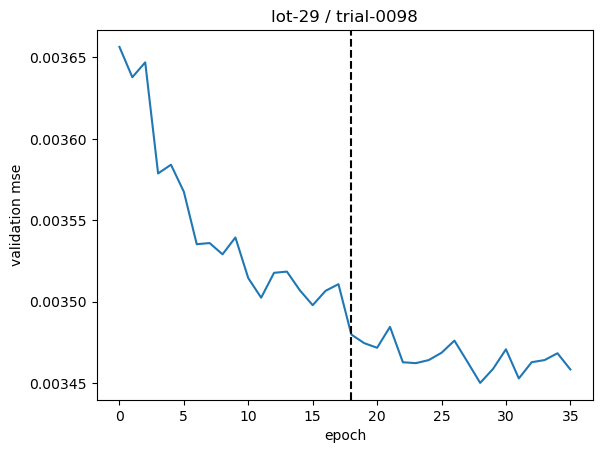

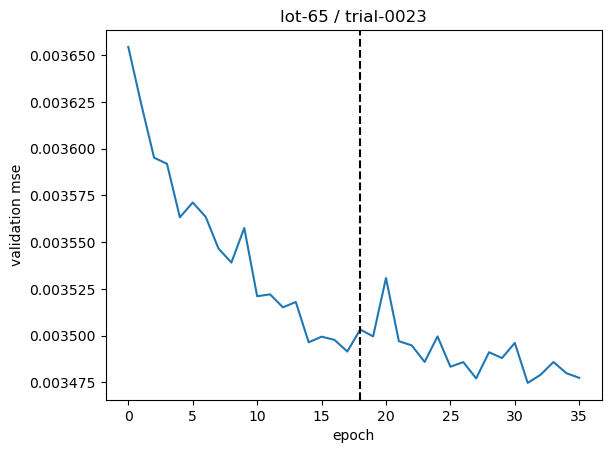

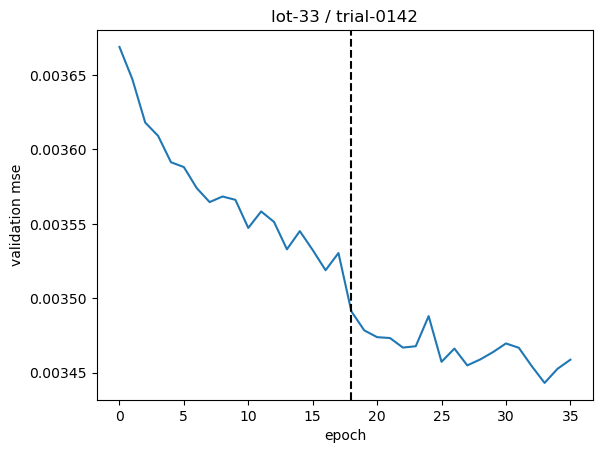

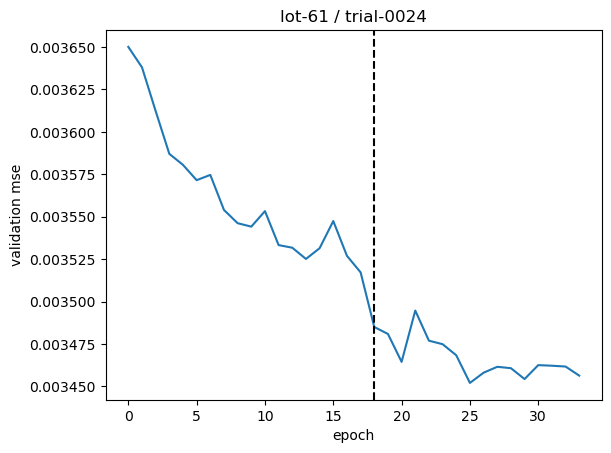

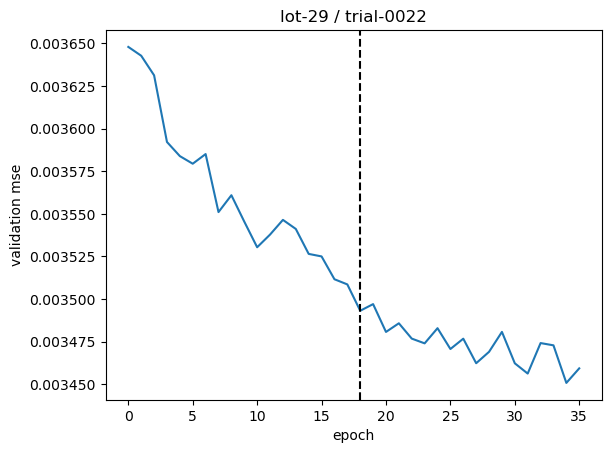

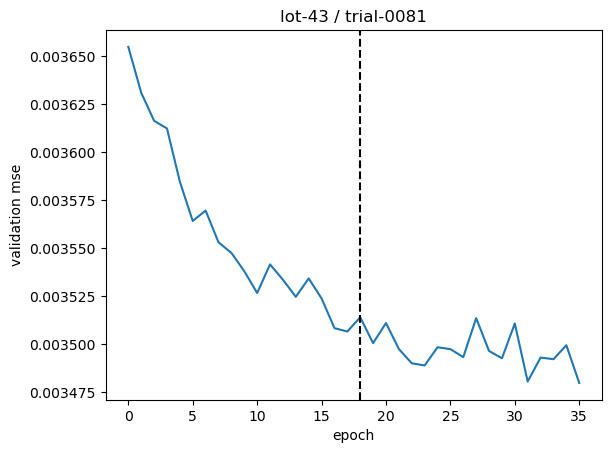

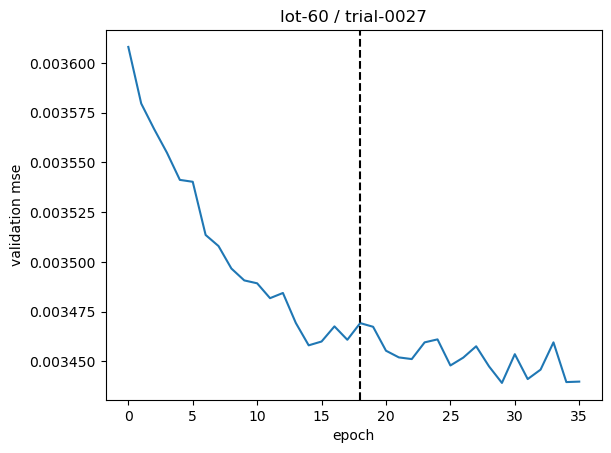

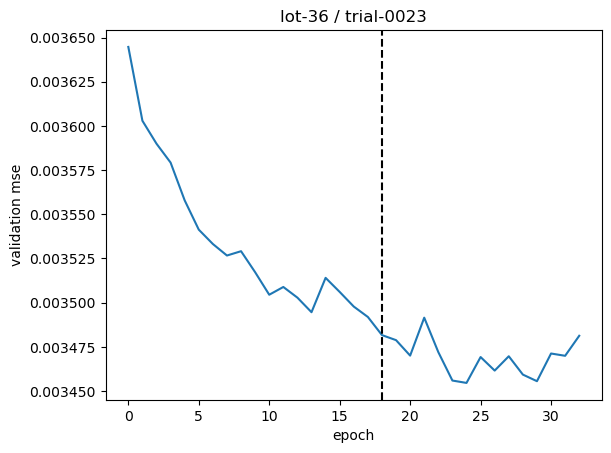

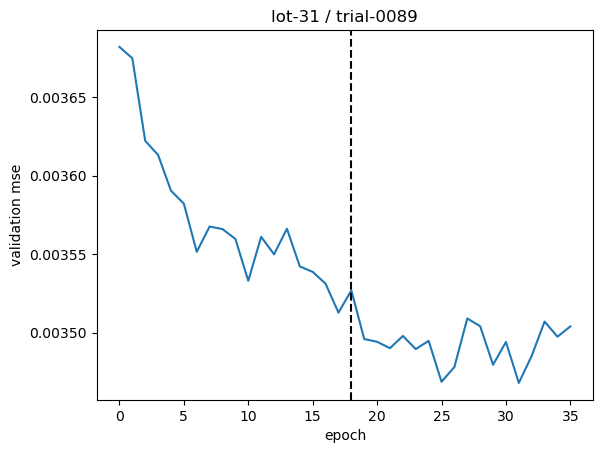

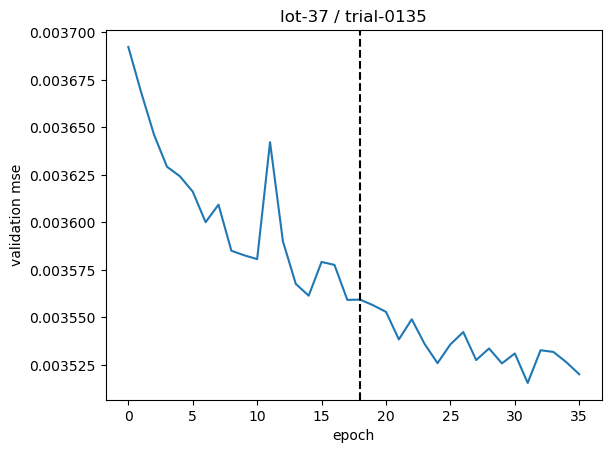

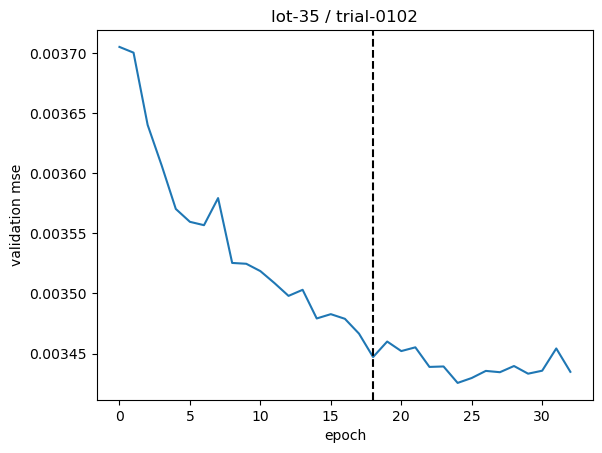

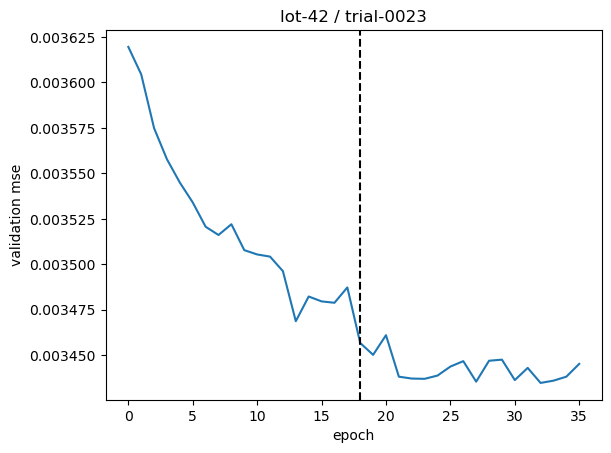

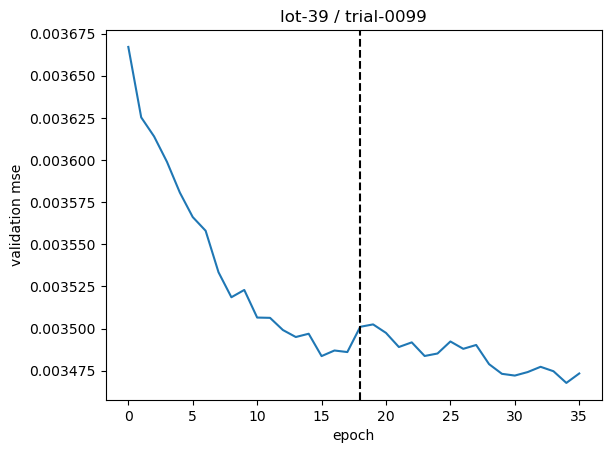

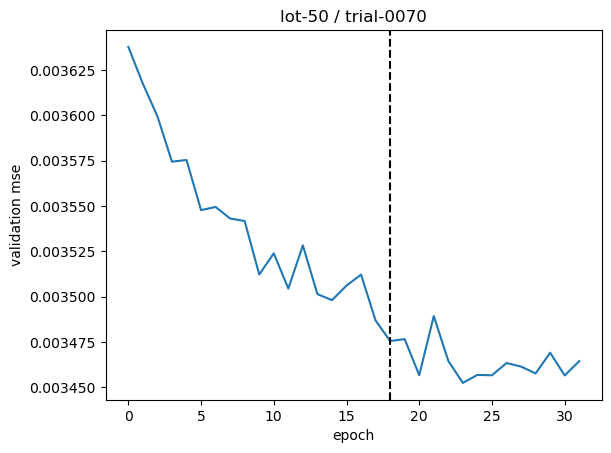

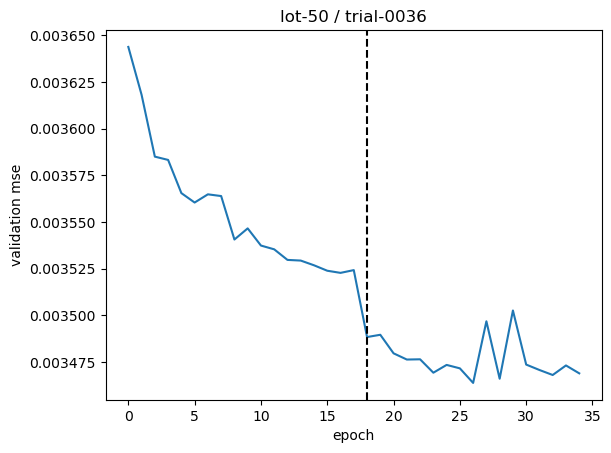

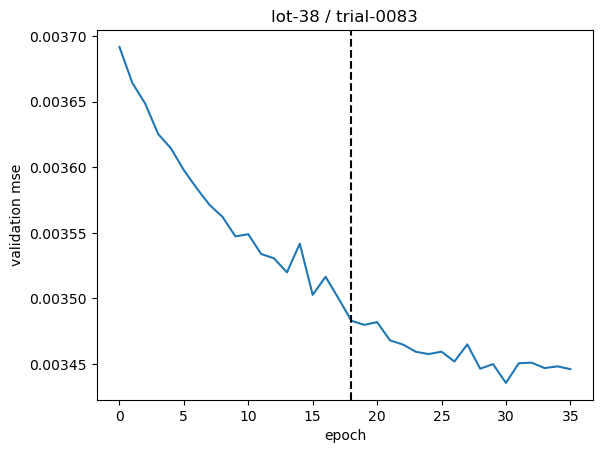

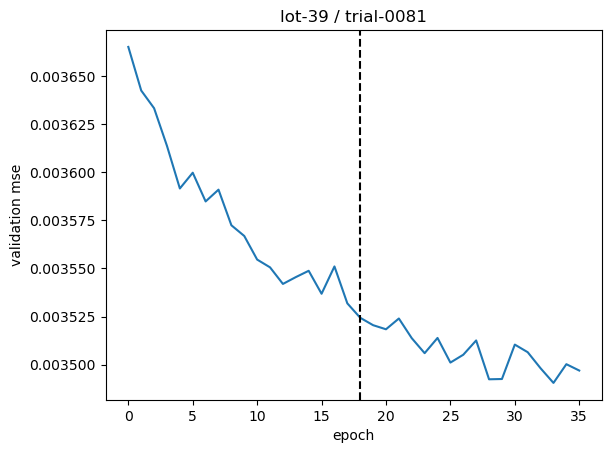

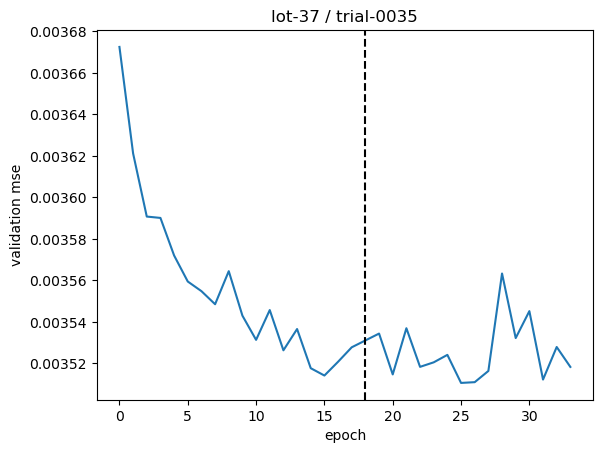

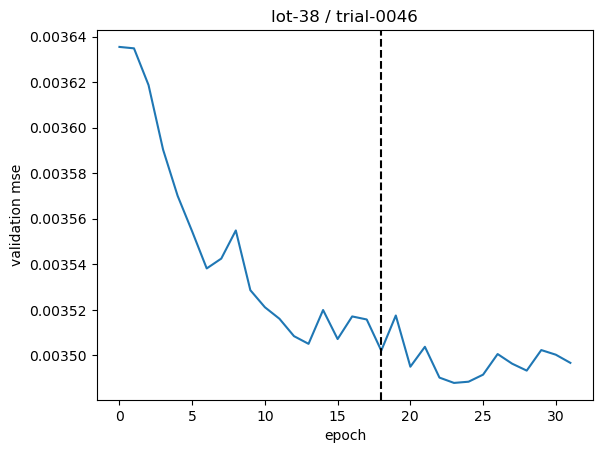

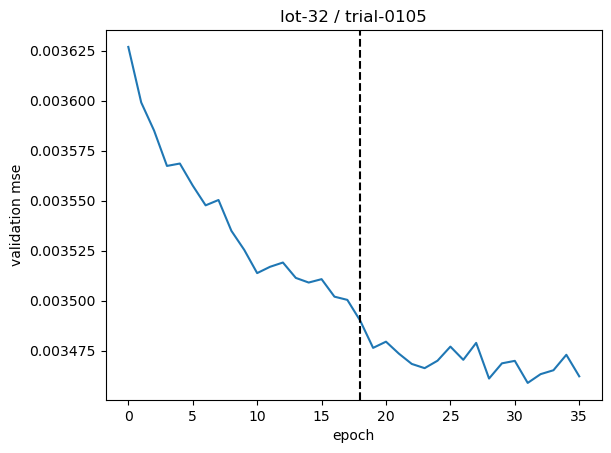

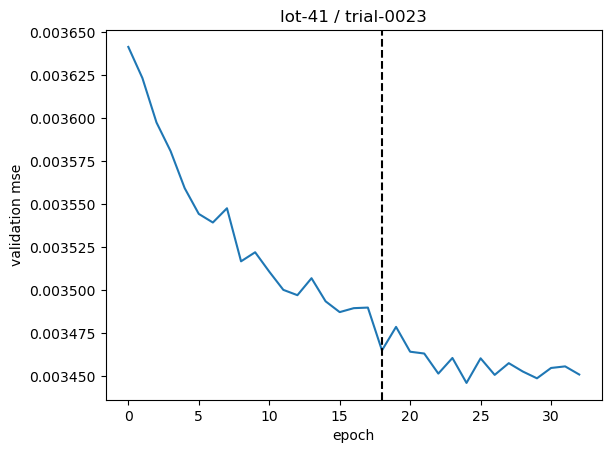

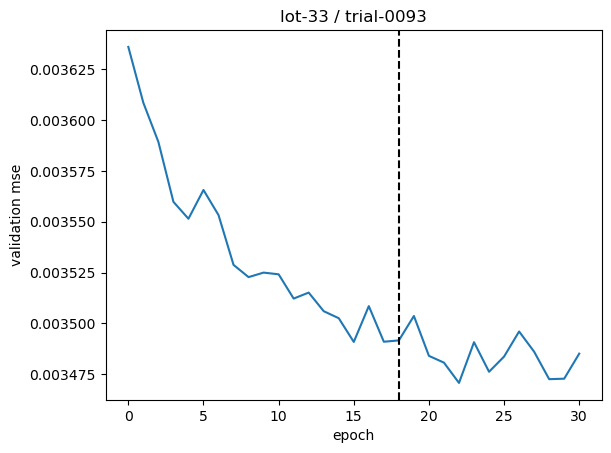

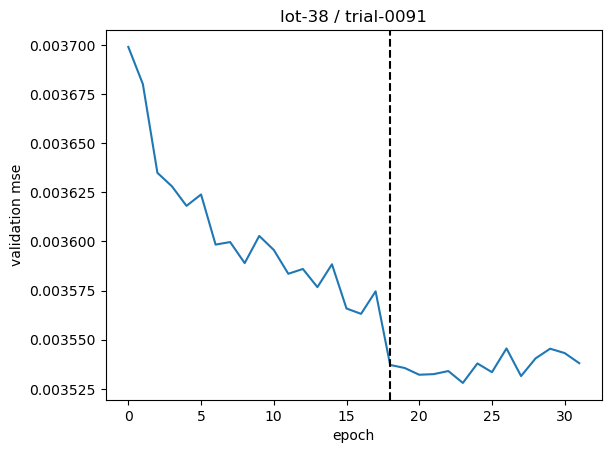

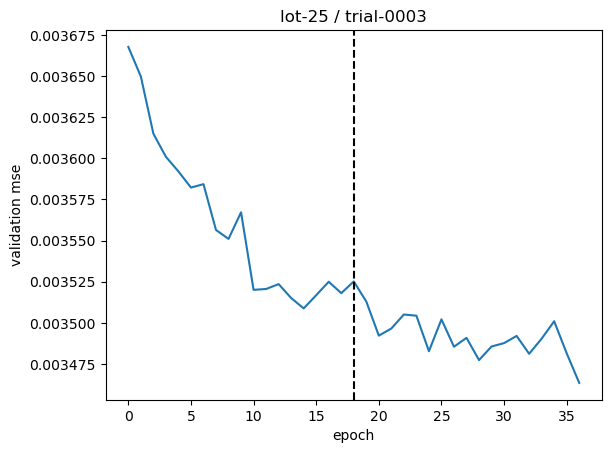

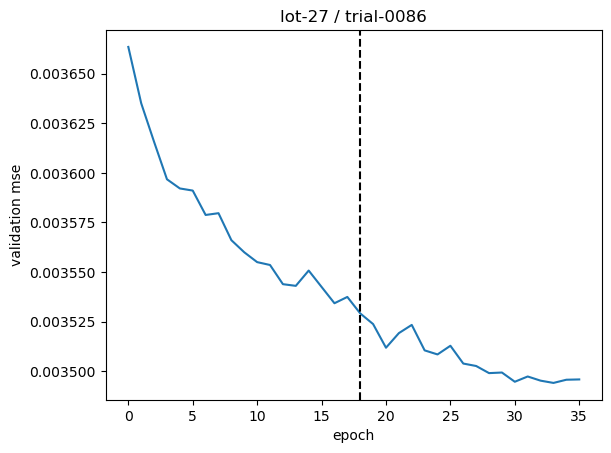

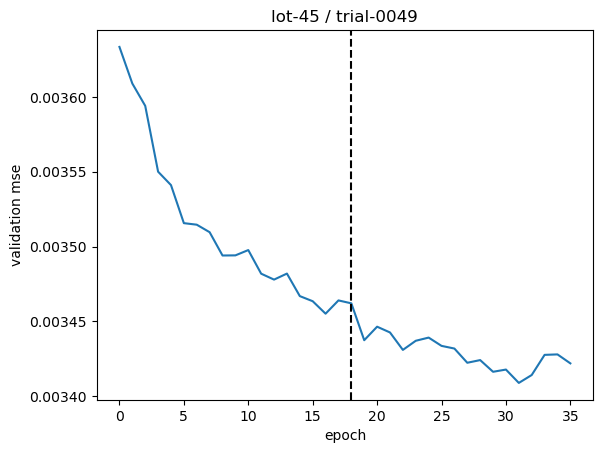

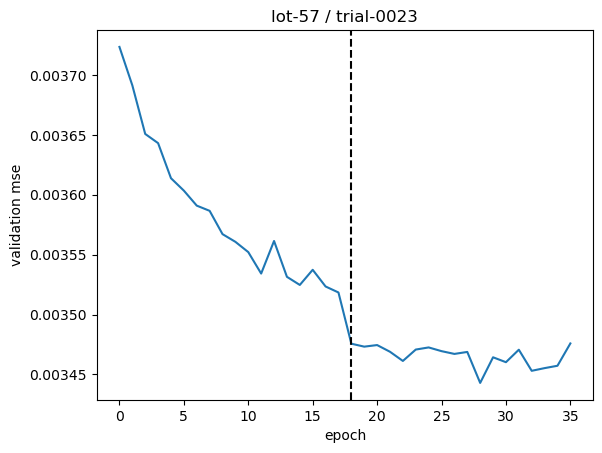

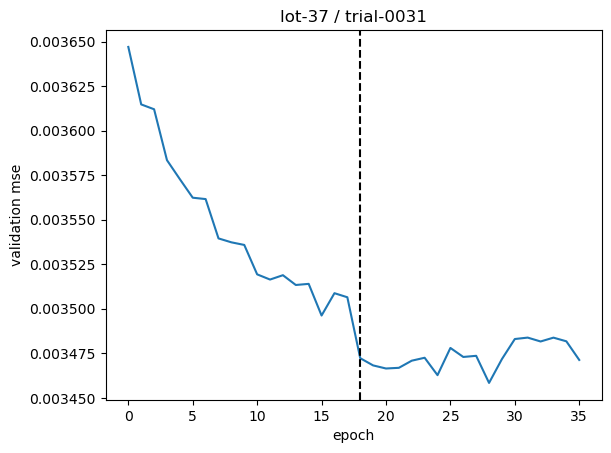

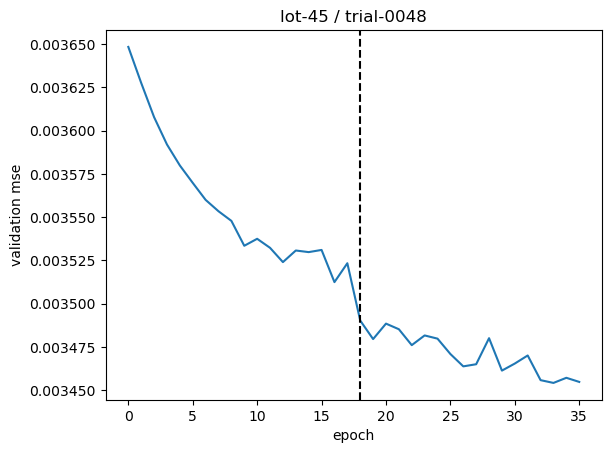

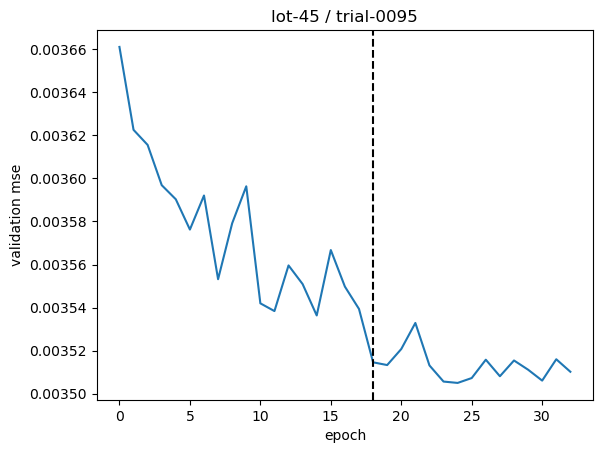

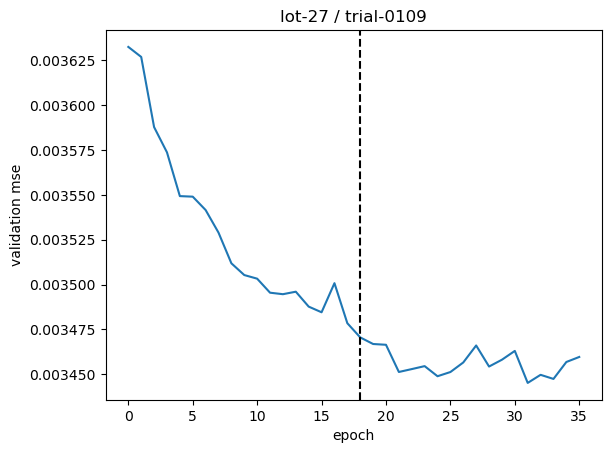

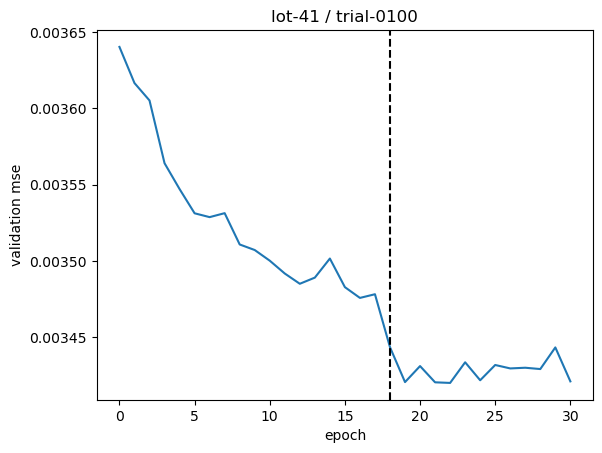

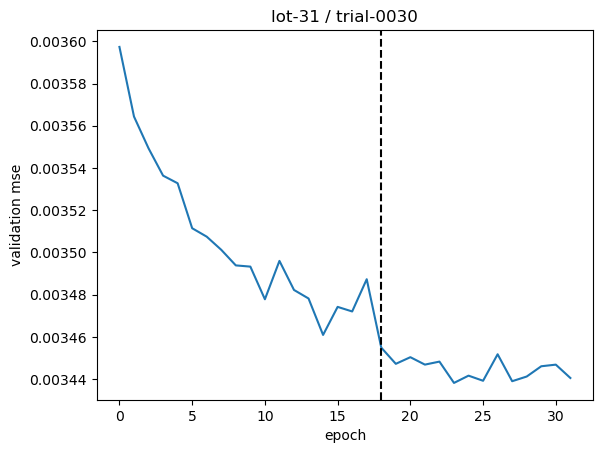

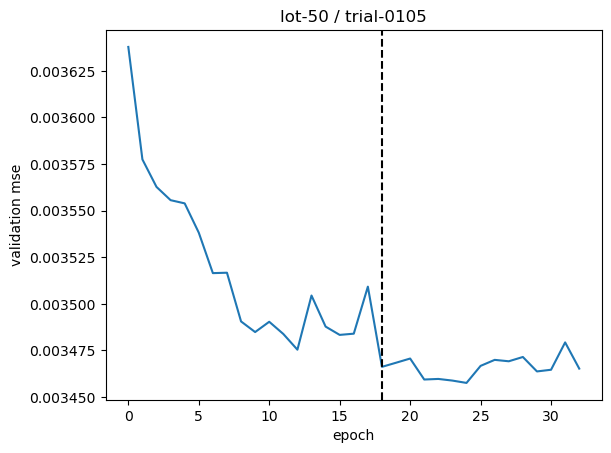

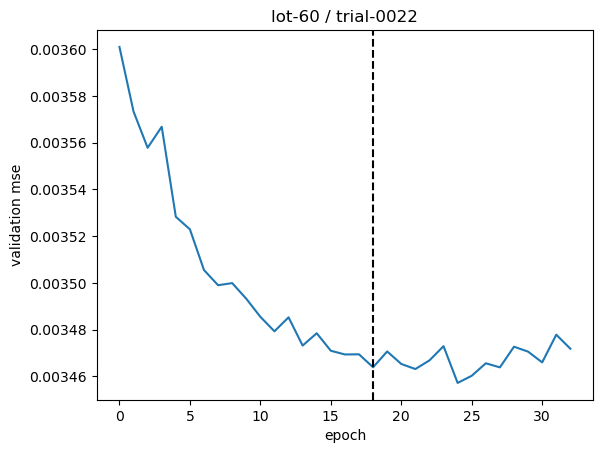

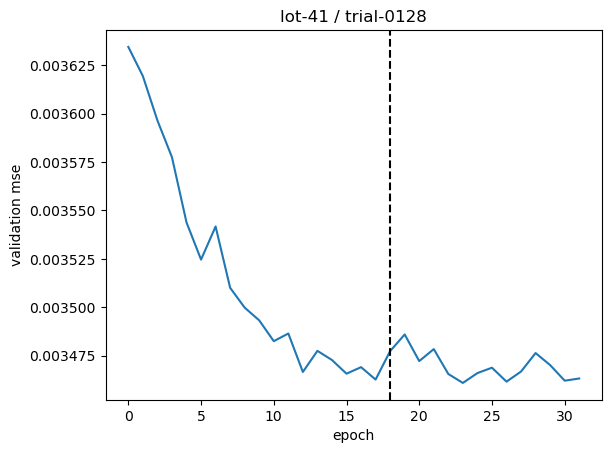

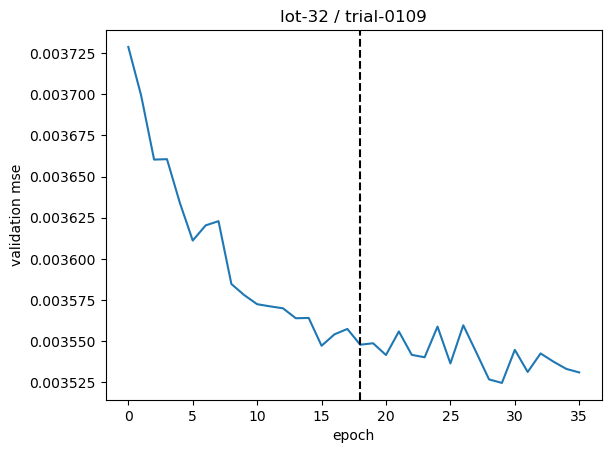

In [4]:
# showing each model individually

for k in RESULTS.keys():
    fig, ax = plt.subplots()
    plotdata = RESULTS[k]
    ax.plot(plotdata['val_loss'],label=k)
    ax.set_title(f"{plotdata['lot']} / {plotdata['trial']}")
    ax.set_xlabel('epoch')
    ax.set_ylabel('validation mse')
    
    # dahsed black line:
    # shows "when training was stopped and resumed"
    ind_resume = plotdata['epoch'].loc[plotdata['epoch'] ==0 ].index[-1]
    ax.axvline(ind_resume, color='k', ls='--')
    # print(ind_resume)